# Task 1:Problem Understanding
## 1)Specify the business problem,
## 2)Business requirements
## 3)Literature Survey
## 4)Social/Business impact

# Task 2:Data Understanding
## 1)Data collection
## 2)Loading data


# Task 3:EDA
## 1)Discriptive statistical
## 2)Visual Analysis

# Task 4:Model Building

# Task 5:Testing and model

# Task 6:deplyment

# Task 7:Doc





In [130]:
# import libaries

import pandas as pd
import numpy as np

In [131]:
from collections import Counter as c
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle



In [132]:
# checking for available style
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [133]:
# Applying styles to notebook

plt.style.use("fivethirtyeight")

In [134]:
# Reading csv data

data=pd.read_csv("/content/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [135]:
#return all the column name

data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [136]:
# manualy giving the name of the column

data.columns=['id','age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood glucose random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertenstion','diabetesmellitus','coronary_artery_disease','appetite','pedal_edema','anemia','class']
data.columns            

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertenstion',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [137]:
#info will give you a summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [138]:
#it will retrun true if any columns is having null values

data.isnull().any()

id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertenstion               True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [139]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mode()[0],inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean,inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mode()[0],inplace=True)
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertenstion'].fillna(data['hypertenstion'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [140]:
# only fetch the object type column
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'red_blood_cell_count', 'bacteria', 'pus_cell_clumps', 'hypertenstion', 'pedal_edema', 'coronary_artery_disease', 'anemia', 'appetite', 'red_blood_cells', 'white_blood_cell_count', 'diabetesmellitus', 'packed_cell_volume', 'class', 'pus_cell'}


In [142]:


  for i in catcols:
    print("columns:",i)
    print(c([i]))
    print('*'*120 +' \n')

columns: red_blood_cell_count
Counter({'red_blood_cell_count': 1})
************************************************************************************************************************ 

columns: bacteria
Counter({'bacteria': 1})
************************************************************************************************************************ 

columns: pus_cell_clumps
Counter({'pus_cell_clumps': 1})
************************************************************************************************************************ 

columns: hypertenstion
Counter({'hypertenstion': 1})
************************************************************************************************************************ 

columns: pedal_edema
Counter({'pedal_edema': 1})
************************************************************************************************************************ 

columns: coronary_artery_disease
Counter({'coronary_artery_disease': 1})
*******************************************

In [143]:
#remove is used for removing a particular column
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'bacteria', 'pus_cell_clumps', 'hypertenstion', 'pedal_edema', 'coronary_artery_disease', 'anemia', 'appetite', 'red_blood_cells', 'diabetesmellitus', 'class', 'pus_cell'}


In [144]:
#Labeling encoding of categorical column

catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus','hypertenstion','pus_cell','pus_cell_clumps','red_blood_cells']

In [145]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABLE ENCODING:",i)
  LEi=LabelEncoder()
  print(c(data[i]))
  data[i]=LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABLE ENCODING: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABLE ENCODING: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABLE ENCODING: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABLE ENCODING: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABLE ENCODING: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABLE ENCODING: coronary_artery_disease
Counter(

In [146]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'anemia', 'appetite', 'potassium', 'blood glucose random', 'blood_urea', 'red_blood_cells', 'albumin', 'bacteria', 'coronary_artery_disease', 'specific_gravity', 'hemoglobin', 'class', 'pus_cell', 'id', 'serum_creatinine', 'hypertenstion', 'pus_cell_clumps', 'sugar', 'age', 'blood_pressure', 'sodium', 'diabetesmellitus', 'pedal_edema'}


In [147]:
for i in contcols:
  print("Continous Columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

Continous Columns: anemia
Counter({0: 340, 1: 60})
************************************************************************************************************************

Continous Columns: appetite
Counter({0: 318, 1: 82})
************************************************************************************************************************

Continous Columns: potassium
Counter({4.62724358974359: 88, 5.0: 30, 3.5: 30, 4.9: 27, 4.7: 17, 4.8: 16, 4.0: 14, 4.2: 14, 4.1: 14, 3.8: 14, 3.9: 14, 4.4: 14, 4.5: 13, 3.7: 12, 4.3: 12, 3.6: 8, 4.6: 7, 3.4: 5, 5.2: 5, 5.7: 4, 5.3: 4, 3.2: 3, 5.5: 3, 2.9: 3, 5.4: 3, 6.3: 3, 3.3: 3, 2.5: 2, 5.8: 2, 5.9: 2, 5.6: 2, 3.0: 2, 6.5: 2, 6.4: 1, 6.6: 1, 39.0: 1, 7.6: 1, 47.0: 1, 5.1: 1, 2.8: 1, 2.7: 1})
************************************************************************************************************************

Continous Columns: blood glucose random
Counter({148.0365168539326: 44, 99.0: 10, 100.0: 9, 93.0: 9, 107.0: 8, 117.0: 6, 140.0: 6, 92

In [148]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'anemia', 'appetite', 'potassium', 'blood glucose random', 'blood_urea', 'red_blood_cells', 'bacteria', 'coronary_artery_disease', 'hemoglobin', 'class', 'pus_cell', 'id', 'serum_creatinine', 'hypertenstion', 'pus_cell_clumps', 'age', 'blood_pressure', 'sodium', 'diabetesmellitus', 'pedal_edema'}


In [149]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'anemia', 'appetite', 'potassium', 'blood glucose random', 'blood_urea', 'red_blood_cells', 'red_blood_cell_count', 'bacteria', 'coronary_artery_disease', 'hemoglobin', 'class', 'pus_cell', 'white_blood_cell_count', 'id', 'packed_cell_volume', 'serum_creatinine', 'hypertenstion', 'pus_cell_clumps', 'age', 'blood_pressure', 'sodium', 'diabetesmellitus', 'pedal_edema'}


In [150]:
#replacing\tno wi
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
data['coronary_artery_disease']

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: coronary_artery_disease, Length: 400, dtype: int64

In [151]:
from matplotlib.font_manager import dataclasses
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\types':'yes'})
data['diabetesmellitus']

0      4
1      3
2      4
3      3
4      3
      ..
395    3
396    3
397    3
398    3
399    3
Name: diabetesmellitus, Length: 400, dtype: int64

In [152]:
#computes summary values for contions column data
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,sodium,potassium,hemoglobin,hypertenstion,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,137.528754,4.627244,12.526437,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,9.204273,2.819783,2.716171,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,135.000000,4.000000,10.875000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,137.528754,4.627244,12.526437,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,141.000000,4.800000,14.625000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,163.000000,47.000000,17.800000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


<ipython-input-153-3323bb223b46>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

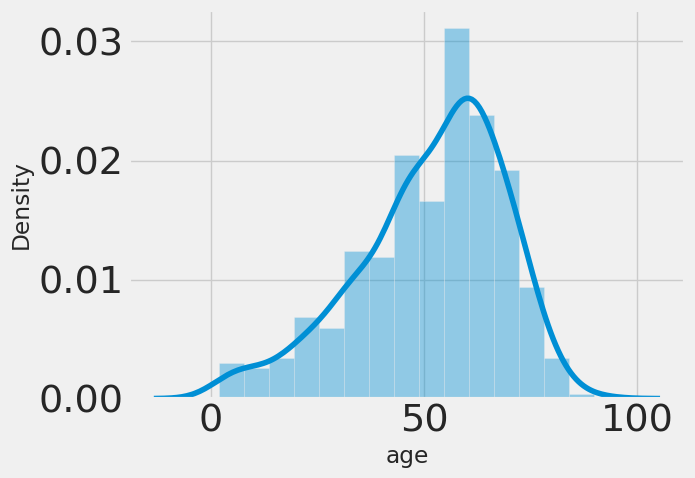

In [153]:
# Age distribution
sns.distplot(data.age)

Text(0.5, 1.0, 'age vs blood pressure')

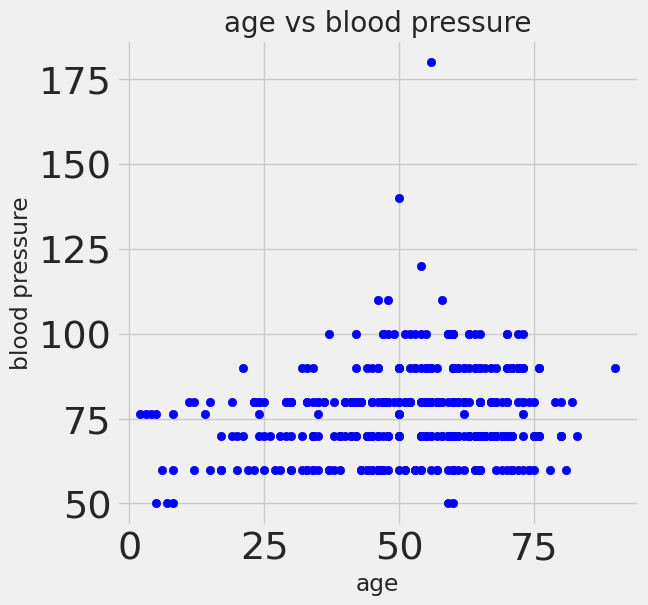

In [154]:
#Age vs Blood Pressure
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title("age vs blood pressure")

TypeError: ignored

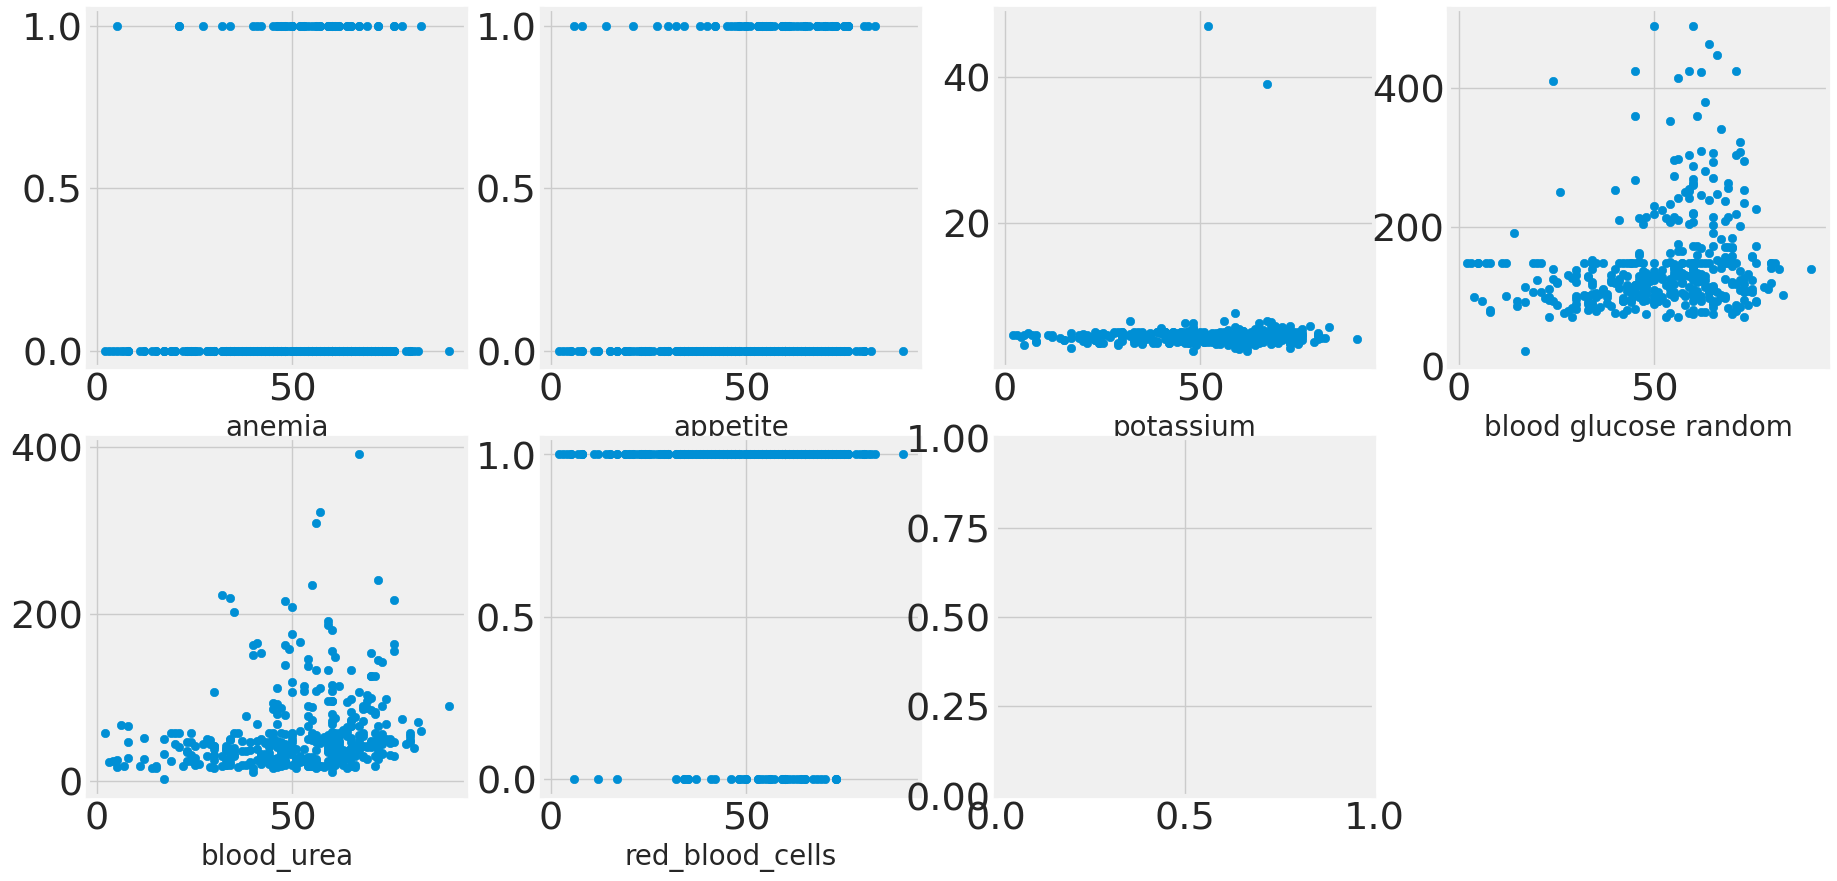

In [155]:
#Age vs all continous columns
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for column in contcols:
  if plotnumber<=11 :
    ax=plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()


<ipython-input-156-3789efa46b1b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")


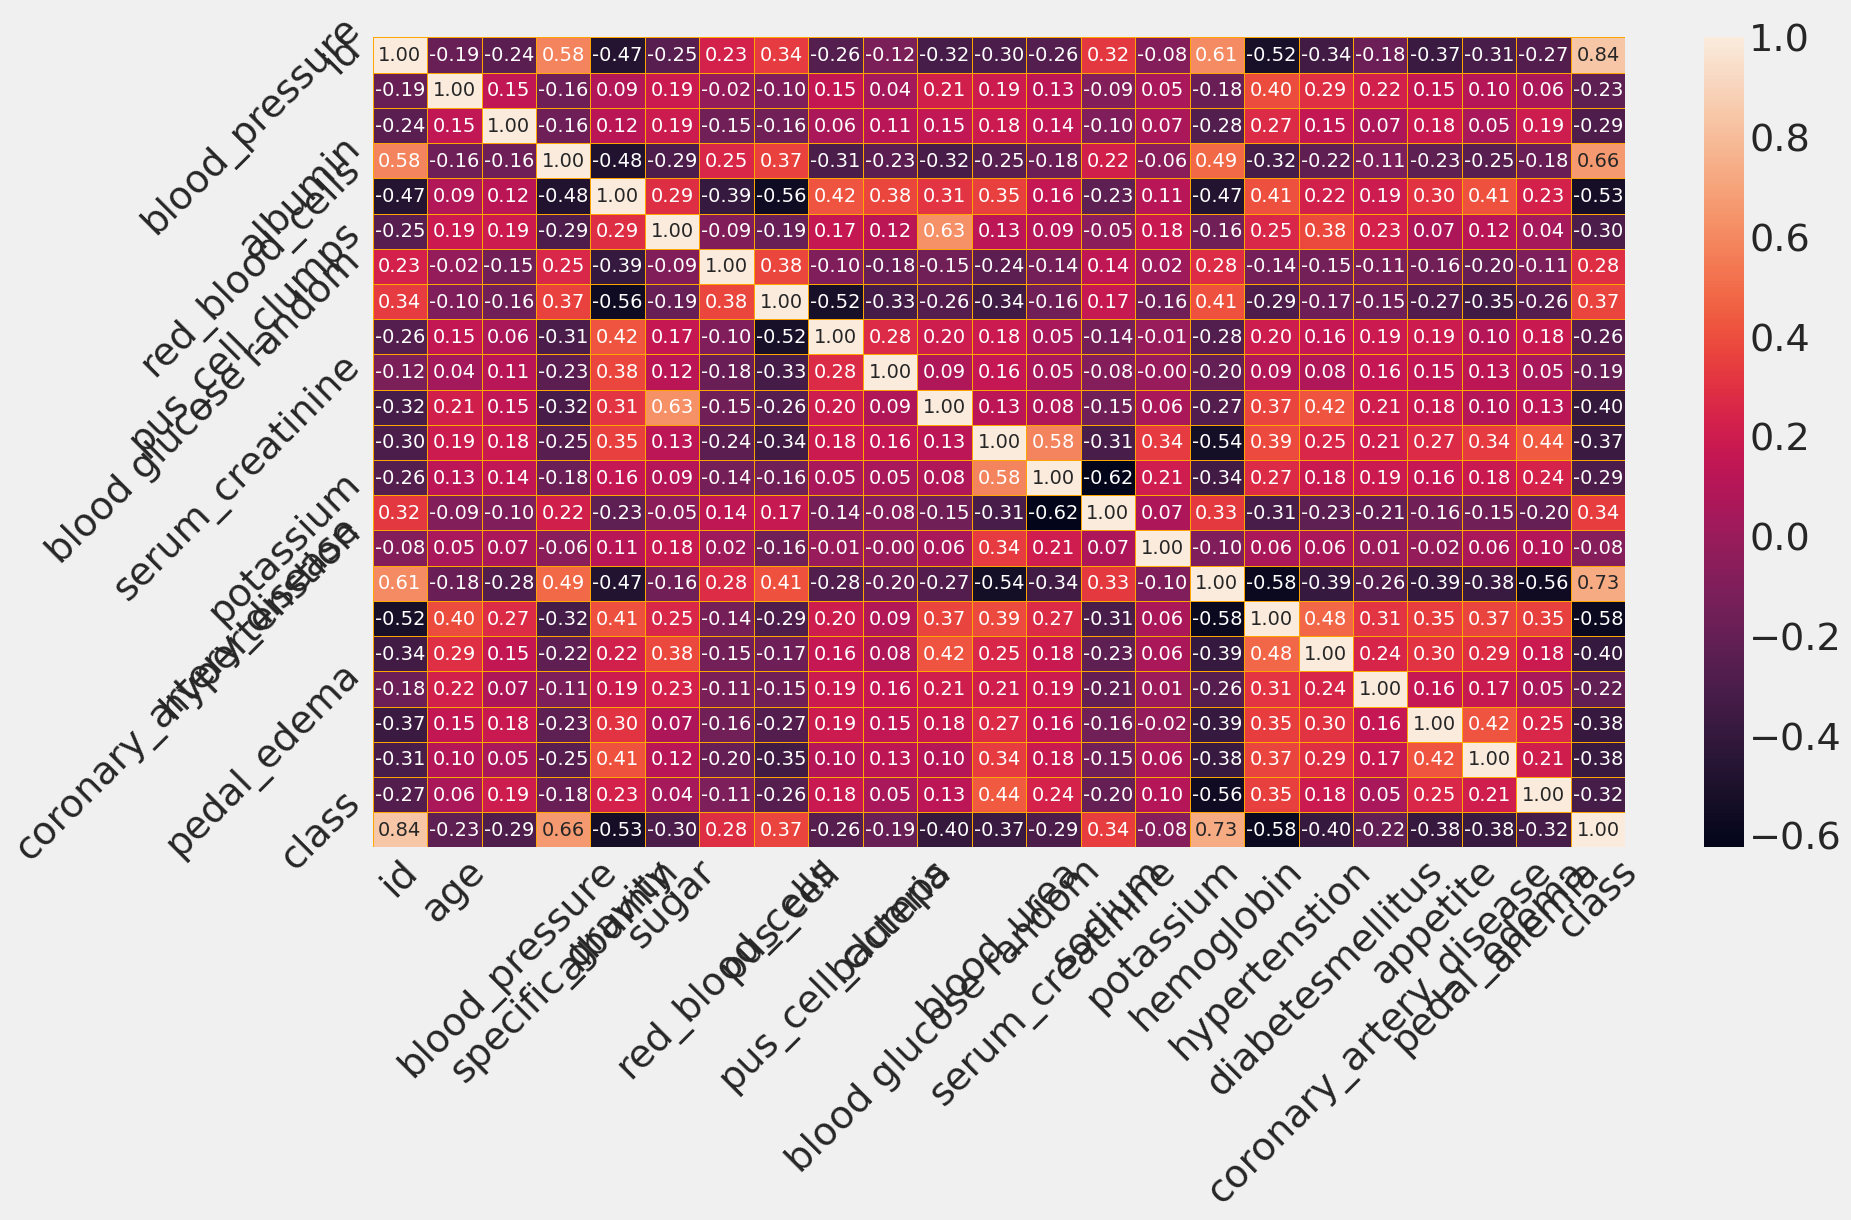

In [156]:
#HEAT MAP #correlation of paramrters
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: xlabel='class', ylabel='count'>

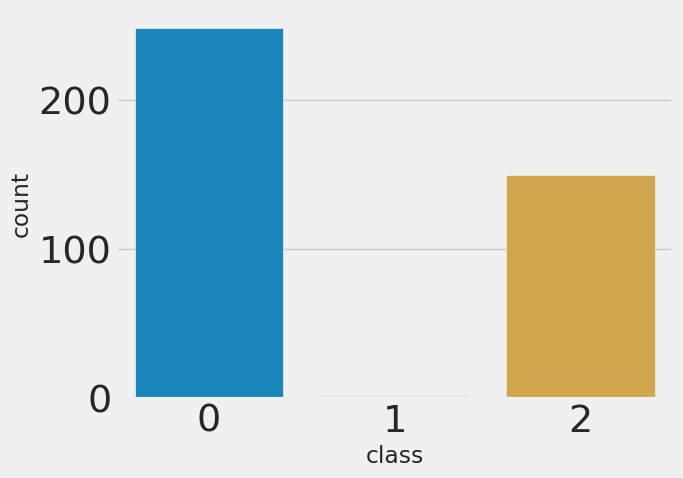

In [157]:
sns.countplot(x=data['class'])


In [158]:
data['class'].unique()

array([0, 1, 2])

In [159]:
data['class'].replace({"CKD":1,"CKD\t":2,"NO CKD":0})

0      0
1      0
2      0
3      0
4      0
      ..
395    2
396    2
397    2
398    2
399    2
Name: class, Length: 400, dtype: int64

In [160]:
#spliting independent &dependent variable
X=data.drop('class',axis=1)
Y=data['class']

In [161]:
# convert object dtype into int dtype
from sklearn.preprocessing import StandardScaler

In [162]:

sc=StandardScaler()

In [164]:
#Creating independent and dependent
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
X=pd.DataFrame(data,columns=selcols)
Y=pd.DataFrame(data,columns=['class'])
print(X.shape)
print(Y.shape)

(400, 8)
(400, 1)


In [165]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [166]:
x_train


,red_blood_cells,pus_cell,blood glucose random,blood_urea,pedal_edema,anemia,diabetesmellitus,coronary_artery_disease
205,1,1,100.000000,28.0,0,0,4,1
354,1,1,102.000000,17.0,0,0,3,1
3,1,0,117.000000,56.0,1,1,3,1
264,1,1,132.000000,24.0,0,0,3,1
194,1,0,148.036517,49.0,0,0,1,1
...,...,...,...,...,...,...,...,...
299,1,1,127.000000,48.0,0,0,3,1
22,1,0,95.000000,163.0,0,1,3,1
72,1,0,148.036517,35.0,1,0,4,1
15,1,1,76.000000,162.0,0,1,3,1


In [41]:
y_train

,class
205,0
354,2
3,0
264,2
194,0
...,...
299,2
22,0
72,0
15,0


In [42]:
#Importing the keras libraries and packages
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
classification=Sequential()
classification.add(Dense(26,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [44]:
#compiling the ANN model
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
#Traing the model
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 [==============================] - 2s 18ms/step - loss: 0.7180 - accuracy: 0.2617 - val_loss: 0.6419 - val_accuracy: 0.1875
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6074 - accuracy: 0.2383 - val_loss: 0.4530 - val_accuracy: 0.3594
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 0.9163 - accuracy: 0.2539 - val_loss: 0.4240 - val_accuracy: 0.4375
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5706 - accuracy: 0.2617 - val_loss: 0.3647 - val_accuracy: 0.3750
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5072 - accuracy: 0.2969 - val_loss: 1.2174 - val_accuracy: 0.1562
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 0.5249 - accuracy: 0.2266 - val_loss: 0.4075 - val_accuracy: 0.3125
Epoch 7/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3465 - accuracy: 0.3281 - val_loss: 0.2678 - val_accuracy: 0.2969
Epoch 8/100


In [46]:
X

,red_blood_cells,pus_cell,blood glucose random,blood_urea,pedal_edema,anemia,diabetesmellitus,coronary_artery_disease
0,1,1,121.000000,36.0,0,0,4,1
1,1,1,148.036517,18.0,0,0,3,1
2,1,1,423.000000,53.0,0,1,4,1
3,1,0,117.000000,56.0,1,1,3,1
4,1,1,106.000000,26.0,0,0,3,1
...,...,...,...,...,...,...,...,...
395,1,1,140.000000,49.0,0,0,3,1
396,1,1,75.000000,31.0,0,0,3,1
397,1,1,100.000000,26.0,0,0,3,1
398,1,1,114.000000,50.0,0,0,3,1


In [47]:
Y

,class
0,0
1,0
2,0
3,0
4,0
...,...
395,2
396,2
397,2
398,2


In [48]:
print("shape of independent training data is{}",format(x_train.shape))
print("shape of independent testing data is{}",format(x_test.shape))
print("shape of dependent training data is{}",format(x_train.shape))
print("shape of dependent testing data is{}",format(x_test.shape))

shape of independent training data is{} (320, 8)
shape of independent testing data is{} (80, 8)
shape of dependent training data is{} (320, 8)
shape of dependent testing data is{} (80, 8)


In [49]:
#Initailizing logistic reg
log_r = LogisticRegression()

In [50]:
# Training model
log_r.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
#RandomForestmodel
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [53]:
rfc.fit(x_train,y_train)

<ipython-input-53-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [54]:
y_predict = rfc.predict(x_test)

In [55]:
y_predict_train = rfc.predict(x_train)

In [56]:
#Decidion tree model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [58]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [59]:
y_predict= dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0])

In [60]:
y_predict_train = dtc.predict(x_train)

In [61]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
from sklearn.metrics import accuracy_score,classification_report
y_predict=lgr.predict(x_test)

In [63]:
# logistic regression
y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [64]:
# DecisionTree Classifier
y_pred=dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [65]:
#Random Forest Classifier
y_pred=rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
(y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [66]:
classification.save("ckd.h5")

In [67]:
# Testing the model
y_pred=classification.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [68]:
y_pred

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],

In [69]:
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [70]:
def predict_exit(sample_value):
  sample_value=np.array(sample_value)#Convert list to numpy array
  #Reshape because sample_value contain only 1 record
  sample_value=sample_value.reshape(1,-1)
  #Feature scaling
  sample_value=sc.transform(sample_value)
  return classifier.predict(sample_value)

In [71]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
  print('prediction:High chance of CKD!')
else:
  print('prediction:Low chance of CKD')


1/1 [==============================] - 0s 136ms/step
prediction:High chance of CKD!


In [72]:

from sklearn import model_selection

In [167]:
from pandas import DataFrame
from sklearn import model_selection

dfs = []
models = [('LogReg',LogisticRegression()),
    ('RF',RandomForestClassifier()),
    ('DecisionTree',DecisionTreeClassifier())]
results = []
names = []
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
target_names = ['NO CKD',' CKD']
for name, model in models:
      kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
      cv_results= model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
      clf = model.fit(x_train,y_train)
      y_pred = clf.predict(x_test)
      print(name)
      print(classification_report(y_test,y_pred,target_names=target_names))
      results.append(cv_results)
      names.append(name)
      this_df=pd.DataFrame(cv_results)
      this_df['model'] = name
      dfs.append(this_df)
final = pd.concat(dfs,ignore_index=True)
return final

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent cal

LogReg


ValueError: ignored

In [74]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]])

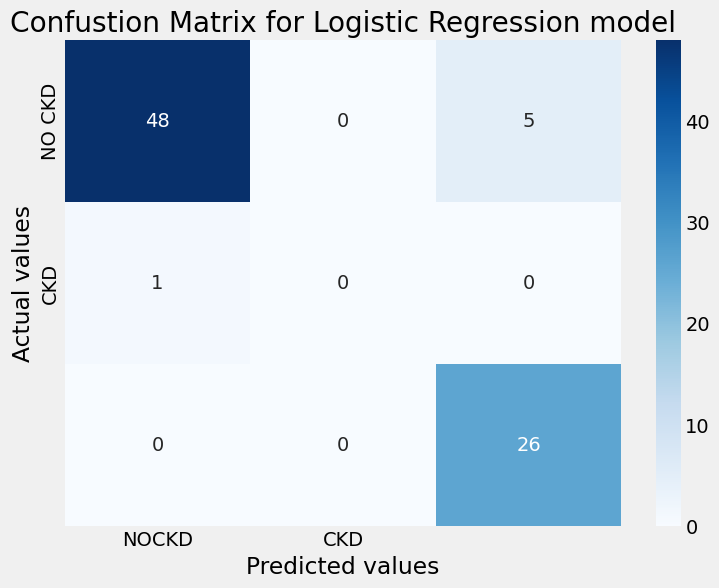

In [75]:
# plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['NOCKD','CKD'],yticklabels=['NO CKD','CKD'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confustion Matrix for Logistic Regression model')
plt.show()

In [76]:
# Making theConfusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]])

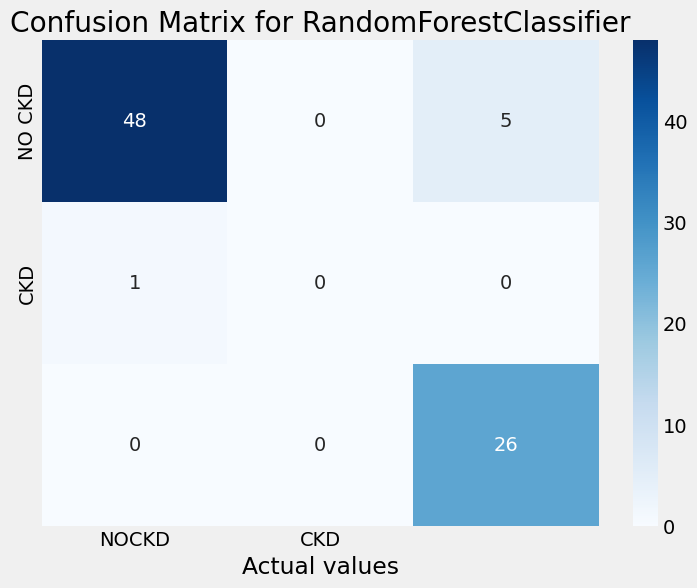

In [77]:
#ploting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['NOCKD','CKD'],yticklabels=['NO CKD','CKD'])
plt.xlabel('Predicted values')
plt.xlabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [78]:
# making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]])

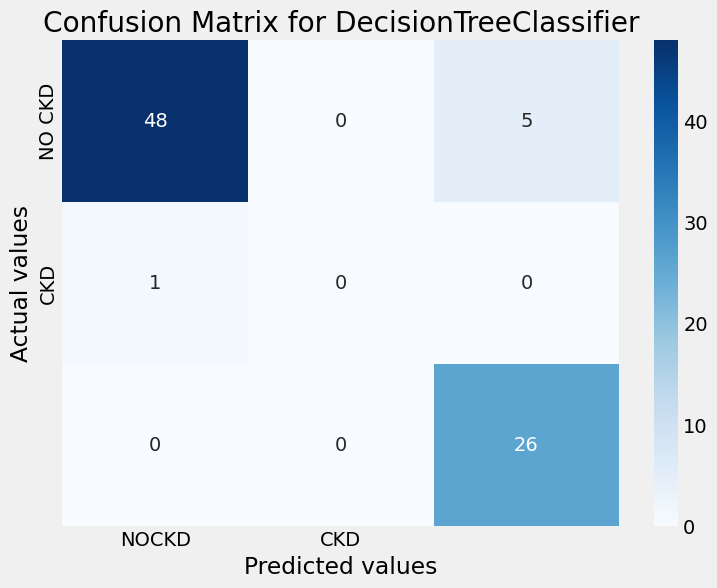

In [79]:
# plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['NOCKD','CKD'],yticklabels=['NO CKD','CKD'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [80]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]])

In [81]:
#For ANN
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.00      0.00      0.00         1
           2       0.84      1.00      0.91        26

    accuracy                           0.93        80
   macro avg       0.61      0.64      0.62        80
weighted avg       0.92      0.93      0.92        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]])

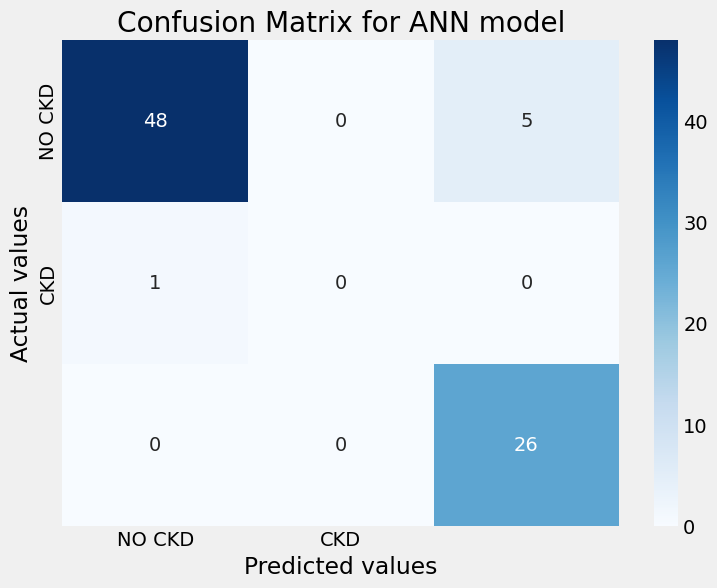

In [83]:
# plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['NO CKD','CKD'],yticklabels=['NO CKD','CKD'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [84]:
#Evaluate the results
bootstraps=[]
for model in list(set(final.model.values)):
  model_df=final.loc[final==model]
  bootstrap=model_df.sample(n=30,replace=True)
  bootstraps.append(bootstrap)

bootstrap_df=pd.concat(bootstraps,ignore_index=True)
results_long=pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics',value_name='values')
time_metrics=['fit_time','score_time']#fit time metrics
##PERFORMANCE METRICS
result_long_nofit=result_long.loc[~results_long['metrics'].isin(time_metrics)]#get df without fit data
results_long_nofit=result_long_nofit.sort_values(by='values')
##TIME METRICS
result_long_fit=result_long_loc[results_long['metrics'].isin(time_metrics)]#df with fit data
results_long_fit=result_long_fit.sort_values(by='values')


NameError: ignored

In [85]:
#comparison of model by Classification Metric
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g=sns.boxplot(x="model",y="values",hue="metrics",data=results_long_nofit,palette="set3")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.title('Comparison of model by Classification Metric')
plt.savefig('./benchmark_model_performance.png',dpi=300)

NameError: ignored

<Figure size 2000x1200 with 0 Axes>